### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [1]:
import pandas as pd
import numpy as np

In [20]:
df = pd.read_csv('data\drugLibTrain_raw.tsv',sep='\t', index_col=0)

### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categoricas con pocas categorias (menos de 10)

In [21]:
df.describe(include='all')

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
count,3107,3107.000000,3107,3107,3106,3107,3105,3099
unique,502,NaN,5,5,1426,3032,2814,3047
top,lexapro,NaN,Highly Effective,Mild Side Effects,depression,none,none,none
freq,63,NaN,1330,1019,236,20,112,6
mean,NaN,7.006115,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.937582,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df['effectiveness'].unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

In [23]:
df['sideEffects'].unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

In [24]:
df = df[['rating','effectiveness','sideEffects']]

<function matplotlib.pyplot.show(close=None, block=None)>

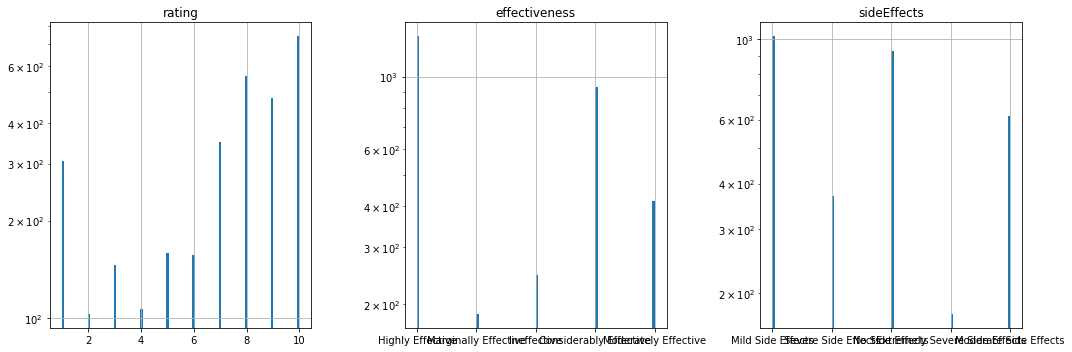

In [25]:
import matplotlib.pyplot as plt
#we can see in all variables except for years and stars that the frequency of 0 es huge
figure = plt.figure(figsize=(15,5))

for n, c in enumerate(df.columns):
  ax = figure.add_subplot(1,3,n+1)
  ax.set_title(c)
  ax.set_yscale("log") #the log scale help us to have a better idea of our data when the distribution is not fair
  df[c].hist(ax=ax, bins=100)

figure.tight_layout() #this feature separate the graphs correctly
plt.show

#### Transforma las columnas categoricas

Transforma las columnas categoricas a numericas mediante dummies

In [30]:
df = pd.get_dummies(df)
df

,rating,effectiveness_Considerably Effective,effectiveness_Highly Effective,effectiveness_Ineffective,effectiveness_Marginally Effective,effectiveness_Moderately Effective,sideEffects_Extremely Severe Side Effects,sideEffects_Mild Side Effects,sideEffects_Moderate Side Effects,sideEffects_No Side Effects,sideEffects_Severe Side Effects
2202,4,0,1,0,0,0,0,1,0,0,0
3117,1,0,1,0,0,0,0,0,0,0,1
1146,10,0,1,0,0,0,0,0,0,1,0
3947,3,0,0,0,1,0,0,1,0,0,0
1951,2,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1039,10,0,1,0,0,0,0,1,0,0,0
3281,1,0,0,1,0,0,1,0,0,0,0
1664,2,0,0,0,1,0,0,0,1,0,0
2621,8,1,0,0,0,0,0,1,0,0,0


#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K. Evalua como mucho K = 20

#### Genera el K Means 

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [44]:
Kmeans_per_k = [KMeans(n_clusters= k , random_state=42).fit(df) for k in range(2,30)]

In [45]:
Silhouette_score = [silhouette_score(df, model.labels_) for model in Kmeans_per_k]

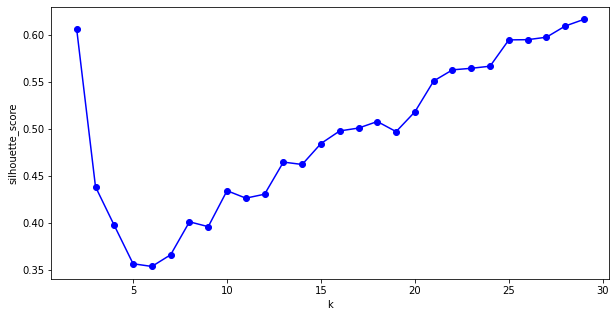

In [51]:
plt.figure(figsize=(10,5))
plt.plot(range(2,30), Silhouette_score, 'bo-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.show()

#### Muestra en un grafico de quesito la distribución de los distintos clusters

In [49]:
inertia = [model.inertia_ for model in Kmeans_per_k]

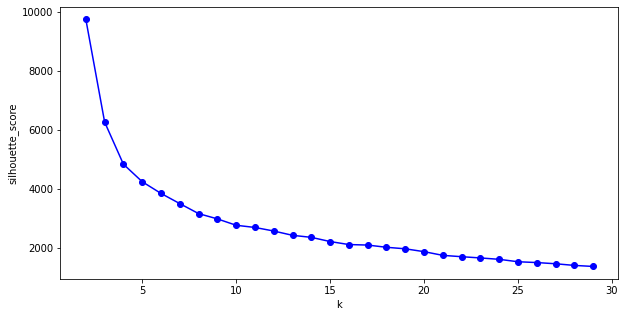

In [50]:
plt.figure(figsize=(10,5))
plt.plot(range(2,30), inertia, 'bo-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.show()

In [54]:
Kmeans = KMeans(n_clusters=2, random_state=42)

In [ ]:
import pandas as pd
df = pd.DataFrame({'Data': Kmeans.labels_})
df['Data'] = 